## Costco stock price analysis

The Costco stock price is interesting to look at. The stock price of Costco has exprienced ups and downs since Covid. A quantitative analysis will be conducted for Costco stock price.

Require information from Yahoo Finance, the examine the returned JSON object

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr

import yfinance as yf

In [2]:
costco = yf.Ticker("COST")

# The info property contains all the key financial data
costco.info

{'zip': '98027',
 'sector': 'Consumer Defensive',
 'fullTimeEmployees': 304000,
 'longBusinessSummary': 'Costco Wholesale Corporation, together with its subsidiaries, engages in the operation of membership warehouses in the United States, Puerto Rico, Canada, the United Kingdom, Mexico, Japan, Korea, Australia, Spain, France, Iceland, China, and Taiwan. It offers branded and private-label products in a range of merchandise categories. The company offers sundries, dry groceries, candies, coolers, freezers, liquor, and tobacco and deli products; appliances, electronics, health and beauty aids, hardware, garden and patio products, sporting goods, tires, toys and seasonal products, office supplies, automotive care products, postages, tickets, apparel, small appliances, furniture, domestics, housewares, special order kiosks, and jewelry; and meat, produce, service deli, and bakery products. It also operates pharmacies, optical, food courts, hearing aids, and tire installation centers, as we

### 1.Fundemental analysis

Grab the following key financial numbers, and store these numbers into a dataframe
<ul>
    <li>Market capitalization</li>
    <li>52-week high</li>
    <li>52-week low</li>
    <li>PE ratio (price to earning ratio)</li>
    <li>ROE Return on equity</li>
    <li>Dividend</li>
</ul>
    

In [5]:
df_fundementals = pd.DataFrame(
    {
        'Marketcap':[costco.info['marketCap']],
        '52-week high':[costco.info['fiftyTwoWeekHigh']],
        '52-week low':[costco.info['fiftyTwoWeekLow']],
        'PE ratio':[costco.info["trailingPE"]],
        'ROE':[costco.info["returnOnEquity"]]
    }
)

df_fundementals

,Marketcap,52-week high,52-week low,PE ratio,ROE
0,231778435072,612.27,406.51,39.85312,0.30549


### 2.Technical analysis

perform a linear regression model

In [6]:
from sklearn.model_selection import train_test_split

Prepare the Costco data from 2020-01-01 to 2022-11-01

In [7]:
df_costco = pd.DataFrame()

startDate = "2020-01-01"
endDate = "2022-11-01"

df_costco = yf.download("COST", start=startDate, end=endDate)

[*********************100%***********************]  1 of 1 completed


Examine the first 5 and last 5 rows of data

In [8]:
df_costco

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,294.059998,294.579987,291.000000,291.489990,277.666992,2103600
2020-01-03,290.049988,292.899994,289.329987,291.730011,277.895630,1926000
2020-01-06,290.549988,292.070007,288.619995,291.809998,277.971741,2655100
2020-01-07,291.320007,291.690002,289.279999,291.350006,277.533630,1963400
2020-01-08,290.989990,295.480011,290.500000,294.690002,280.715210,2492800
...,...,...,...,...,...,...
2022-10-25,493.320007,500.190002,490.500000,499.059998,498.160706,2130900
2022-10-26,498.000000,507.420013,495.690002,499.450012,498.550018,2088700
2022-10-27,499.809998,503.010010,494.140015,496.540009,496.540009,1576600


Obtain some basic descriptive statistics

In [9]:
df_costco.describe()

,Open,High,Low,Close,Adj Close,Volume
count,714.000000,714.000000,714.000000,714.000000,714.000000,7.140000e+02
mean,415.339944,419.694369,411.168502,415.586219,408.905486,2.507109e+06
std,88.367372,89.546005,87.095874,88.371574,92.404797,1.160210e+06
min,280.440002,287.329987,271.279999,279.850006,267.140991,9.725000e+05
25%,340.702507,342.565010,336.939987,339.962494,326.893501,1.770725e+06
50%,384.895004,387.349991,381.650009,384.370010,379.792557,2.170750e+06
75%,494.382492,500.112503,489.505005,495.182510,493.102180,2.839575e+06
max,607.280029,612.270020,597.729980,608.049988,604.924255,9.511600e+06


Perform regression analysis

Explanatory variables: Walmart rate of return, S&P500 return, US Dollar Index(ICE: DX) <br/>
Response variables: Costco rate of return

In [10]:
# Retrieve the adj-close price for these 4 indices
df_dataset = yf.download("COST WMT ^GSPC DX-Y.NYB", start=startDate, end=endDate)['Adj Close']

[*********************100%***********************]  4 of 4 completed


Examine the first and last 5 rows and see if it corresponds to actual data

In [11]:
df_dataset

,COST,DX-Y.NYB,WMT,^GSPC
Date,,,,
2020-01-02,277.666962,96.849998,113.801071,3257.850098
2020-01-03,277.895599,96.839996,112.796448,3234.850098
2020-01-06,277.971832,96.669998,112.566818,3246.280029
2020-01-07,277.533600,96.980003,111.523895,3237.179932
2020-01-08,280.715302,97.300003,111.141197,3253.050049
...,...,...,...,...
2022-10-25,498.160706,110.949997,140.070007,3859.110107
2022-10-26,498.550018,109.699997,141.139999,3830.600098
2022-10-27,496.540009,110.589996,140.729996,3807.300049


Conduct a correlation analysis

In [12]:
df_dataset.corr()

,COST,DX-Y.NYB,WMT,^GSPC
COST,1.000000,0.403460,0.610435,0.798184
DX-Y.NYB,0.403460,1.000000,-0.245682,-0.127848
WMT,0.610435,-0.245682,1.000000,0.726061
^GSPC,0.798184,-0.127848,0.726061,1.000000


Calculate the daily rate of return for each index, and store these data into a new dataframe

In [13]:
df_daily_returns = np.log(df_dataset/df_dataset.shift(1))
df_daily_returns = df_daily_returns.rename({'DX-Y.NYB': 'USDIndex', '^GSPC': 'SP500'}, axis=1)
df_daily_returns

,COST,USDIndex,WMT,SP500
Date,,,,
2020-01-02,NaN,NaN,NaN,NaN
2020-01-03,0.000823,-0.000103,-0.008867,-0.007085
2020-01-06,0.000274,-0.001757,-0.002038,0.003527
2020-01-07,-0.001578,0.003202,-0.009308,-0.002807
2020-01-08,0.011399,0.003294,-0.003437,0.004890
...,...,...,...,...
2022-10-25,0.004197,-0.009330,0.004723,0.016136
2022-10-26,0.000781,-0.011330,0.007610,-0.007415
2022-10-27,-0.004040,0.008080,-0.002909,-0.006101


Make a scatterplot with:
- explanatory variable: Walmart rate of return
- response variable: Costco rate of return 

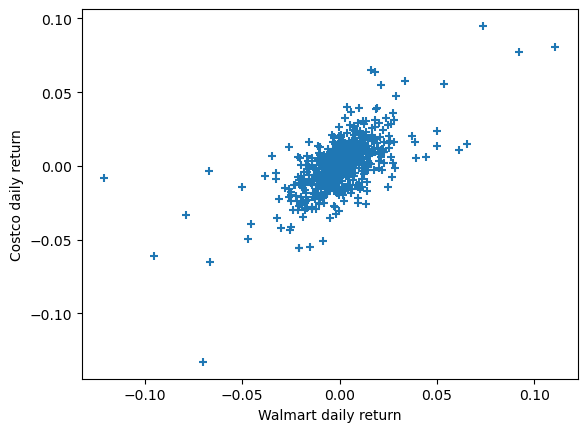

In [14]:
plt.scatter(df_daily_returns['WMT'],df_daily_returns['COST'],marker='+')
plt.xlabel("Walmart daily return")
plt.ylabel("Costco daily return")
plt.show()

There seems to exist a positive correlation between Walmart daily return and Costco daily return.

### Perform a univariate regression

Perform a linear regression analysis and see if it gives any predictive power:

In [15]:
#import the statsmodel and sklearn library
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

# perform a OLS regression
slr_sm_model = smf.ols('COST ~ WMT', data=df_daily_returns)

slr_sm_model_ko = slr_sm_model.fit()

print(slr_sm_model_ko.summary()) 

                            OLS Regression Results                            
Dep. Variable:                   COST   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     536.2
Date:                Sun, 20 Nov 2022   Prob (F-statistic):           9.53e-89
Time:                        13:47:14   Log-Likelihood:                 2086.1
No. Observations:                 710   AIC:                            -4168.
Df Residuals:                     708   BIC:                            -4159.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0006      0.000      1.282      0.2

The regression model is shown as follows:

$
        \hat{Y_i} = 0.000617 + 0.685057 * X_i
$

Intepretation:
- For a unit increase in Walmart ROI, the Costco ROI is expected to increase by 0.685057
- The R^2 coefficient of determination is 0.431, meaning that this model explains 43.1% of variation of the dependent variable..
- The p-value is 0 meaning that this variable is statistically significant

In [11]:
slr_sm_model_ko.params

Intercept    0.000617
WMT          0.685057
dtype: float64

### Perform a multivariate regression 

The model is shown as follow:

$
    \hat{Costco.Return} = \hat{\beta_0} + \hat{\beta_1}*Walmart.Return + \hat{\beta_2} *USD.Index + \hat{\beta_3}*SP500.Return
$

In [12]:
# pass in dataframe columns as parameters:
mulvar_reg_model = smf.ols(formula='COST ~ WMT + USDIndex + SP500', data=df_daily_returns)

mulvar_reg_model_fit = mulvar_reg_model.fit()
print(mulvar_reg_model_fit.summary())
# extract the key coefficients
print(mulvar_reg_model_fit.params)

                            OLS Regression Results                            
Dep. Variable:                   COST   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     339.4
Date:                Sat, 19 Nov 2022   Prob (F-statistic):          2.12e-136
Time:                        11:05:56   Log-Likelihood:                 2203.0
No. Observations:                 710   AIC:                            -4398.
Df Residuals:                     706   BIC:                            -4380.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0006      0.000      1.436      0.1

Observations:
- The USDIndex is insignificant in this model
- The R^2 value goes up from 0.431 to 0.589, meaning that this multivariate model is a better fit compared to the previous univariate model.

## Machine Learning forecasting

Use indicator: EMA10(Exponential Moving Average 10 days) for machine learning forecasting. The smoothing value by default is 2.

Prepare the data

In [16]:
# import the pandas_ta lib: a pandas library for technical analysis
import pandas_ta as ta

df_costco_ema = pd.DataFrame()

df_costco_ema['COST'] = df_dataset['COST']
df_costco_ema['Exponential MA'] = ta.ema(df_dataset['COST'], length=10)

#drop the first 9 rows where the EMA column shows NaN:
df_costco_ema = df_costco_ema.iloc[9:,:]
df_costco_ema.head(5)

,COST,Exponential MA
Date,,
2020-01-15,286.554565,281.788797
2020-01-16,288.659729,283.038057
2020-01-17,290.231445,284.345946
2020-01-21,298.404602,286.902065
2020-01-22,297.099609,288.756164


Clean the dataset, remove any rows that contains NaN

In [17]:
df_costco_ema[df_costco_ema.isna().any(axis=1)]
df_costco_ema = df_costco_ema[df_costco_ema['Exponential MA'].notna()]

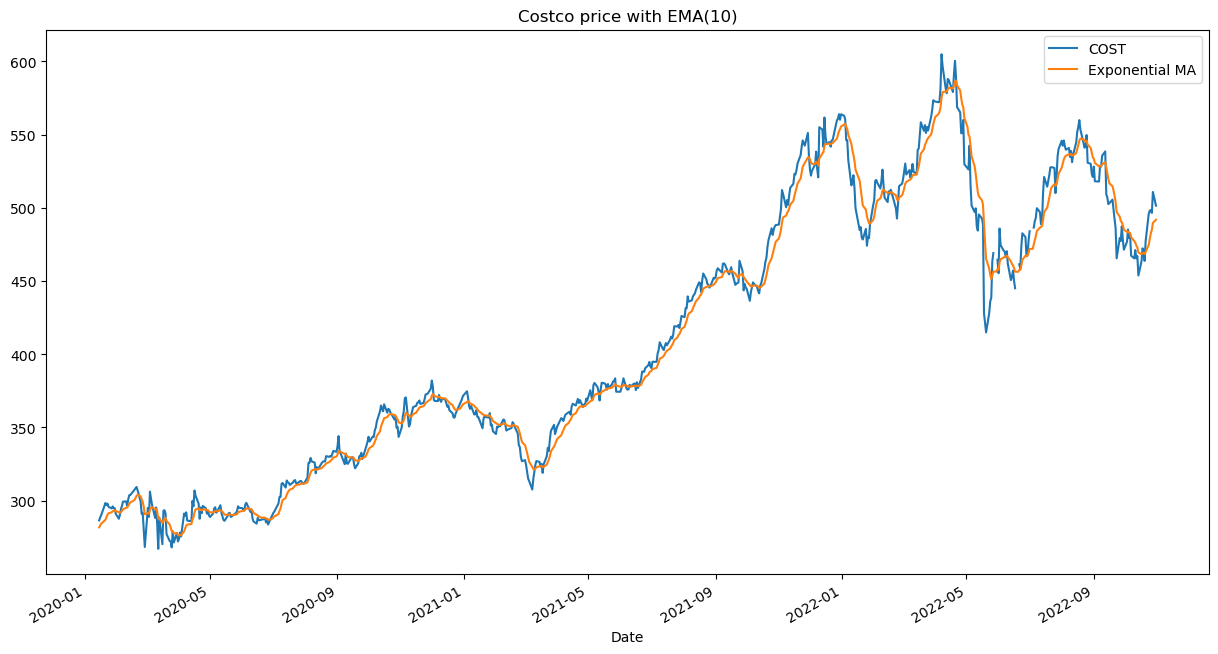

In [18]:
df_costco_ema.plot(figsize=(15,8),title="Costco price with EMA(10)")
plt.show()

Split the data into training test & testing set
<br>
<br>
The ratio of training:testing would be 8:2, meaning we use 80% of the data to train the model, and the rest 20% to test the model

In [21]:
# prepare the training-testing data
train,test = train_test_split(df_costco_ema, test_size=0.2)

# data cleaning: there exists some NaN values, so fill the NaN with the previous non-NaN value
train.isnull().sum()
test.isnull().sum()
train = train.fillna(method='ffill')
test = test.fillna(method='ffill')

Plot a scatterplot

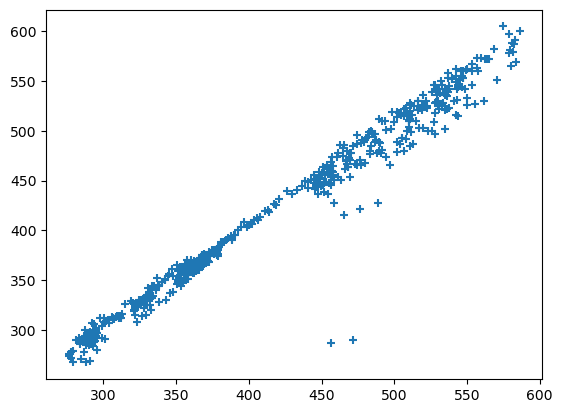

In [22]:
plt.scatter(train["Exponential MA"],train["COST"], marker="+")
plt.show()

Try to fit a linear regression model on the testing set 

In [23]:
model = LinearRegression()
model.fit(train[["Exponential MA"]], train["COST"])
print(model.intercept_, model.coef_, model.score(train[["Exponential MA"]], train["COST"]))

3.117770326699258 [0.99399718] 0.9746926183305339


The regression model is calculated as follow:
<br>
<br>
$
    \hat{Costo.Price} = 3.11777 + 0.99399 * EMA(10)
$
<br>
<br>
<br>
Test the model

In [113]:
COST_pred = model.predict(test[["Exponential MA"]])
len(COST_pred)

142

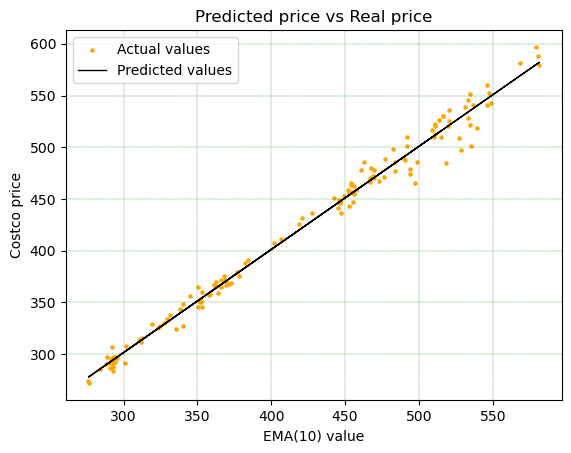

In [128]:
plt.scatter(test["Exponential MA"], test["COST"], color = 'orange', s=5)
plt.plot(test["Exponential MA"], model.predict(test[["Exponential MA"]]), color = 'black',linewidth = 1)
plt.title('Predicted price vs Real price')
plt.xlabel('EMA(10) value')
plt.ylabel('Costco price')
plt.legend(["Actual values","Predicted values"])
plt.grid(color = 'green', linestyle = '--', linewidth = 0.25)
plt.show()

Plot the residuals as well

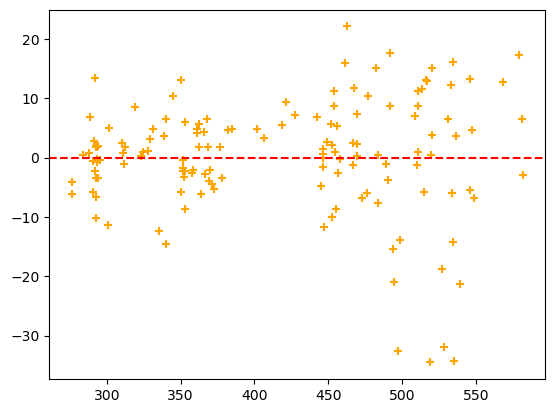

In [136]:
plt.scatter(test["Exponential MA"],test["COST"]-model.predict(test[["Exponential MA"]]), color="orange", marker="+")
plt.axhline(y=0, color='r', linestyle='--')